In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error as mse

import math
import keras
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers


def load_data():

    animals_data = np.genfromtxt('data_lab2/animals.dat', delimiter=',')
    animals_data.shape = (32, 84)

    animal_names = np.genfromtxt('data_lab2/animalnames.txt', dtype='str')

    for i in range(len(animal_names)):

        animal_names[i] = animal_names[i].replace("'","")

    return animals_data, animal_names



class SOM():
    def __init__(self, nodes):
        self.nodes = np.random.rand(nodes[0],nodes[1])
        self.num_nodes = nodes[0]
    
    def similarity(self, x, nodes):
        min_dist = 99999
        min_idx = 0
        for row in range(self.num_nodes):
            sim = np.linalg.norm(x - nodes[row])
            if (sim < min_dist):
                min_dist = sim
                min_idx = row
        return min_idx, min_dist
    
    def update_weights(self, x, eta, i):
        self.nodes[i] = self.nodes[i] + eta*(x - self.nodes[i])
        
    def update_neighboors(self, x, winner_idx, nbhd_size, eta, circular = False):
       
        for i in range(max(0,winner_idx-nbhd_size),min(winner_idx+nbhd_size,self.num_nodes)):
                self.update_weights(x,eta,i)
                
        if circular == True:
            print("asfg")
                

    def train(self, X, labels, nbhd_size, n_epochs, eta, circular = False):
        
        for epoch in range(n_epochs):
            for animal in range(len(X)):
                min_idx, min_dist = self.similarity(animal,self.nodes)
                self.update_neighboors(animal,min_idx,nbhd_size,eta,circular)
                
        
        for animal in range(len(X)):
            min_idx, min_dist = self.similarity(animal,self.nodes)
            print(labels[animal],"is represented best by node:",min_idx)
                    
                
        
    
    
data, names = load_data()
network = SOM([100,84])

network.train(data,names,2,1000,eta=0.1)



100
antelop is represented best by node: 97
ape is represented best by node: 3
bat is represented best by node: 0
bear is represented best by node: 90
beetle is represented best by node: 87
butterfly is represented best by node: 84
camel is represented best by node: 81
cat is represented best by node: 78
crocodile is represented best by node: 75
dog is represented best by node: 72
dragonfly is represented best by node: 69
duck is represented best by node: 66
elephant is represented best by node: 63
frog is represented best by node: 60
giraffe is represented best by node: 57
grasshopper is represented best by node: 54
horse is represented best by node: 51
housefly is represented best by node: 48
hyena is represented best by node: 45
kangaroo is represented best by node: 42
lion is represented best by node: 39
moskito is represented best by node: 36
ostrich is represented best by node: 33
pelican is represented best by node: 30
penguin is represented best by node: 27
pig is represented b

In [44]:
print(network.nodes)

[[4.60458291 4.58313276 4.62368264 ... 4.61203639 4.61529816 4.59567806]
 [5.12669021 5.17572223 5.17382179 ... 5.15409504 5.20196376 5.16118504]
 [5.73329439 5.70093892 5.74145256 ... 5.72164718 5.74046874 5.75311861]
 ...
 [0.32689391 0.06880682 0.38425371 ... 0.86577657 0.33203524 0.63626987]
 [0.41863405 0.87271489 0.88901809 ... 0.41836194 0.42108453 0.39844473]
 [0.98696383 0.35748604 0.11523387 ... 0.1726833  0.40606747 0.26736435]]


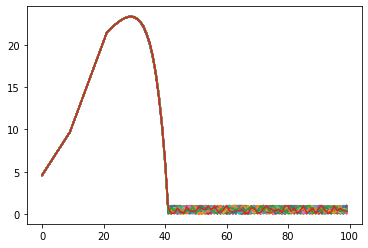

In [45]:
plt.plot(network.nodes)